# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize. Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg width="600">  

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [2]:
# This makes display to output numbers with 2 digits after decimal point.
pd.options.display.float_format = "{:,.2f}".format

### Read the Data

In [3]:
df_data = pd.read_csv("nobel_prize_data.csv")

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Questions**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [4]:
# Investigate
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [5]:
# Q1. What is the shape of `df_data`? How many rows and columns?
df_data.shape

(962, 16)

In [6]:
# Q2. What are the column names?
display(df_data.columns)

# or (I prefer this for readability)
df_data.info()

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [7]:
# Q3. In which year was the Nobel prize first awarded?
df_data["year"].min()

1901

In [8]:
# Q4. Which year is the latest year included in the dataset?
df_data["year"].max()

2020

**Questions**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [9]:
# Q1. Are there any duplicate values in the dataset?
df_data.duplicated().any()
# No

False

In [10]:
# Q2. Are there NaN values in the dataset?
df_data.isna().values.any()
# Yes

True

### Check for NaN Values

In [11]:
# Q3. Which columns tend to have NaN values?
df_data.isna().any()

year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool

In [12]:
# Q4. How many NaN values are there per column?
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [13]:
# Q5. Why do these columns have NaN values?
filt = df_data["laureate_type"] == "Organization"
df_data.loc[filt][["year", "category", "laureate_type", "birth_date"]].head()
# One example of a column containing NaN values is the birth_date column;
# which occurs frequently when the receiving laureate is an organization

,year,category,laureate_type,birth_date
24,1904,Peace,Organization,NaN
60,1910,Peace,Organization,NaN
89,1917,Peace,Organization,NaN
200,1938,Peace,Organization,NaN
215,1944,Peace,Organization,NaN


In [14]:
# Another example is organization_name;
# which occurs frequently when the receiving laureate is an individual
filt = df_data["laureate_type"] == "Individual"
df_data.loc[filt][["year", "category", "laureate_type", "organization_name"]].head()

,year,category,laureate_type,organization_name
0,1901,Chemistry,Individual,Berlin University
1,1901,Literature,Individual,NaN
2,1901,Medicine,Individual,Marburg University
3,1901,Peace,Individual,NaN
4,1901,Peace,Individual,NaN


### Type Conversions

**Q**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [15]:
df_data["birth_date"] = pd.to_datetime(df_data["birth_date"])

In [16]:
# Confirm change
df_data.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
dtype: object

#### Add a Column with the Prize Share as a Percentage

In [17]:
list_share_pct = []
for share in df_data["prize_share"]:
    list_share_pct.append(int(share[0]) / int(share[2]))

df_data["share_pct"] = pd.Series(list_share_pct)

# By using %%timeit, the above is faster than the common way:

# separated_values = df_data.prize_share.str.split('/', expand=True)
# numerator = pd.to_numeric(separated_values[0])
# denomenator = pd.to_numeric(separated_values[1])
# df_data['share_pct'] = numerator / denominator

In [18]:
# Confirm new column
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Q**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [19]:
series_biology = df_data["sex"].value_counts()

fig = px.pie(
    values=series_biology.values,
    title="Percentage of Male vs. Female Winners",
    names=series_biology.index,
    hole=0.4,
)

fig.update_traces(textposition="inside", textfont_size=16, textinfo="percent")

fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Q**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [20]:
df_female = df_data.loc[df_data["sex"] == "Female"]
df_female_sorted_years = df_female.sort_values(by="year")
df_female_sorted_years.head(3)["full_name"]

18                          Marie Curie, née Sklodowska
29    Baroness Bertha Sophie Felicita von Suttner, n...
51                        Selma Ottilia Lovisa Lagerlöf
Name: full_name, dtype: object

# Find the Repeat Winners

**Q**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [21]:
filt = df_data.duplicated(subset="full_name")
pd.DataFrame(df_data.loc[filt]["full_name"].unique())

,0
0,"Marie Curie, née Sklodowska"
1,Comité international de la Croix Rouge (Intern...
2,Linus Carl Pauling
3,John Bardeen
4,Frederick Sanger
5,Office of the United Nations High Commissioner...


# Number of Prizes per Category

**Q**: 
* In how many categories are prizes awarded? 
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [22]:
# Q1. In how many categories are prizes awarded?
n_cat = df_data["category"].nunique()
categories = df_data["category"].unique()

print(f"There are {n_cat} categories: {', '.join(categories).lower()}")

There are 6 categories: chemistry, literature, medicine, peace, physics, economics


In [23]:
# Q2. Create a plotly bar chart with the number of prizes awarded by category.
award_per_category = df_data["category"].value_counts()

v_bar = px.bar(
    award_per_category,
    color=award_per_category.values,
    color_continuous_scale="Brwnyl",
)

v_bar.show()

**Q**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [24]:
filt = df_data["category"] == "Economics"
df_data.loc[filt].sort_values(by="year").iloc[0]

# In 1969, by Jan Tinbergen

year                                                                  1969
category                                                         Economics
prize                    The Sveriges Riksbank Prize in Economic Scienc...
motivation               "for having developed and applied dynamic mode...
prize_share                                                            1/2
laureate_type                                                   Individual
full_name                                                    Jan Tinbergen
birth_date                                             1903-04-12 00:00:00
birth_city                                                       the Hague
birth_country                                                  Netherlands
birth_country_current                                          Netherlands
sex                                                                   Male
organization_name                      The Netherlands School of Economics
organization_city        

# Male and Female Winners by Category

**Q**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [25]:
category_by_sex = df_data.groupby(by="category", as_index=False)["sex"].value_counts()
category_by_sex

,category,sex,count
0,Chemistry,Male,179
1,Chemistry,Female,7
2,Economics,Male,84
3,Economics,Female,2
4,Literature,Male,101
5,Literature,Female,16
6,Medicine,Male,210
7,Medicine,Female,12
8,Peace,Male,90
9,Peace,Female,17


In [26]:
v_split_bar = px.bar(
    x=category_by_sex["category"],
    y=category_by_sex["count"],
    color=category_by_sex["sex"],
)

v_split_bar.update_layout(
    title="Number of Prizes Awarded per Category split by Men and Women",
    xaxis_title="Nobel Prize Category",
    yaxis_title="Number of Prizes",
)
v_split_bar.show()

In [27]:
# Question: Hover over the bar chart. How many prizes went to women in Literature compared to Physics?
# Answer: 16 in literature versus 4 in physics

# Number of Prizes Awarded Over Time

**Q**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 
* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [28]:
# Q. Count the number of prizes awarded every year. 
prize_per_year = df_data.groupby("year")["prize"].count()
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [29]:
# Q. Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
prize_roll_avg = prize_per_year.rolling(window=5).mean()
prize_roll_avg

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, Length: 117, dtype: float64

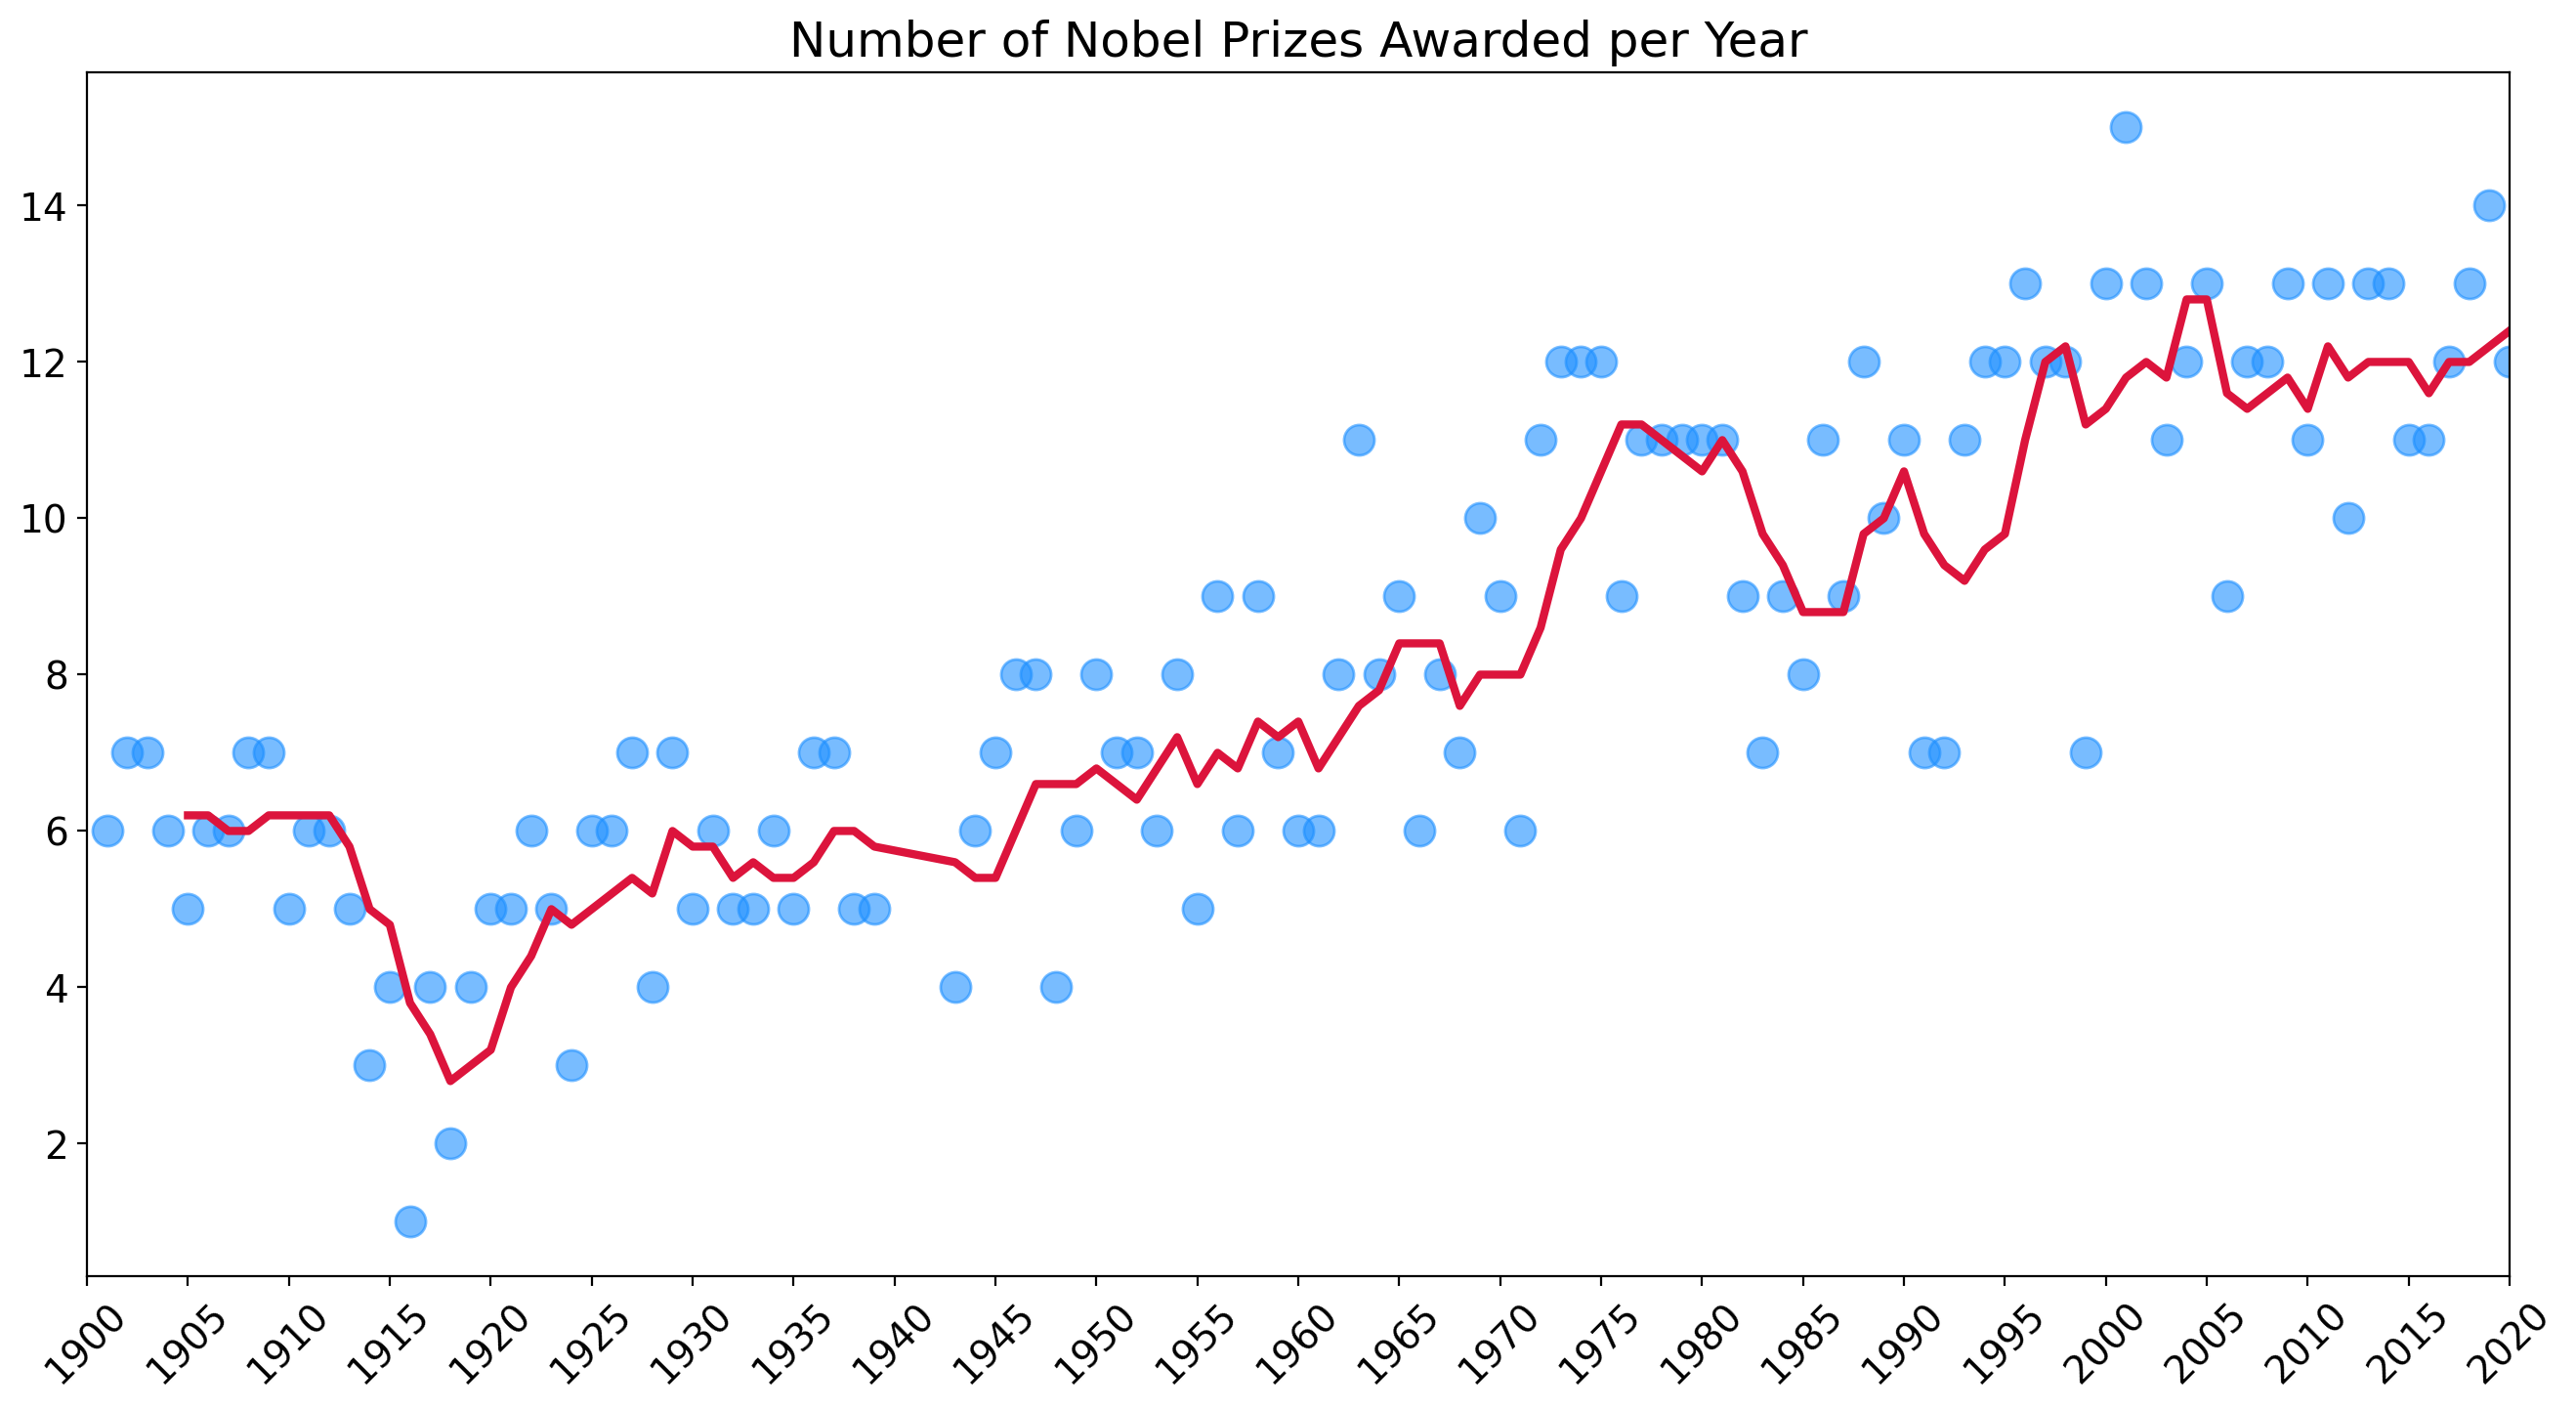

In [30]:
# Q1. Using Matplotlib superimpose the rolling average on a scatter plot.
# Q2. Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).
# Q3. Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data
# points in `dogerblue` while the rolling average is coloured in `crimson`.

plt.figure(figsize=(16, 8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)

# Q2
plt.xticks(ticks=range(1900, 2021, 5), rotation=45, fontsize=14)

plt.yticks(fontsize=14)
plt.xlim(1900, 2020)

# Q3
scatter_plot = plt.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    s=125,
    c="dodgerblue",
    alpha=0.6,
)

# Q1, Q3
line_plot = plt.plot(
    prize_per_year.index,
    prize_roll_avg.values,
    c="crimson",
    linewidth=3,
)

plt.show()

# Are More Prizes Shared Than Before?

**Q**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [31]:
# Q. Calculate the average prize share of the winners on a year by year basis.
share_per_year = df_data.groupby(by="year")["share_pct"].mean()
share_per_year

year
1901   0.83
1902   0.71
1903   0.71
1904   0.83
1905   1.00
       ... 
2016   0.55
2017   0.50
2018   0.46
2019   0.43
2020   0.50
Name: share_pct, Length: 117, dtype: float64

In [32]:
# Q. Calculate the 5 year rolling average of the percentage share.
share_roll_avg = share_per_year.rolling(window=5).mean()
share_roll_avg

year
1901    NaN
1902    NaN
1903    NaN
1904    NaN
1905   0.82
       ... 
2016   0.52
2017   0.50
2018   0.50
2019   0.50
2020   0.49
Name: share_pct, Length: 117, dtype: float64

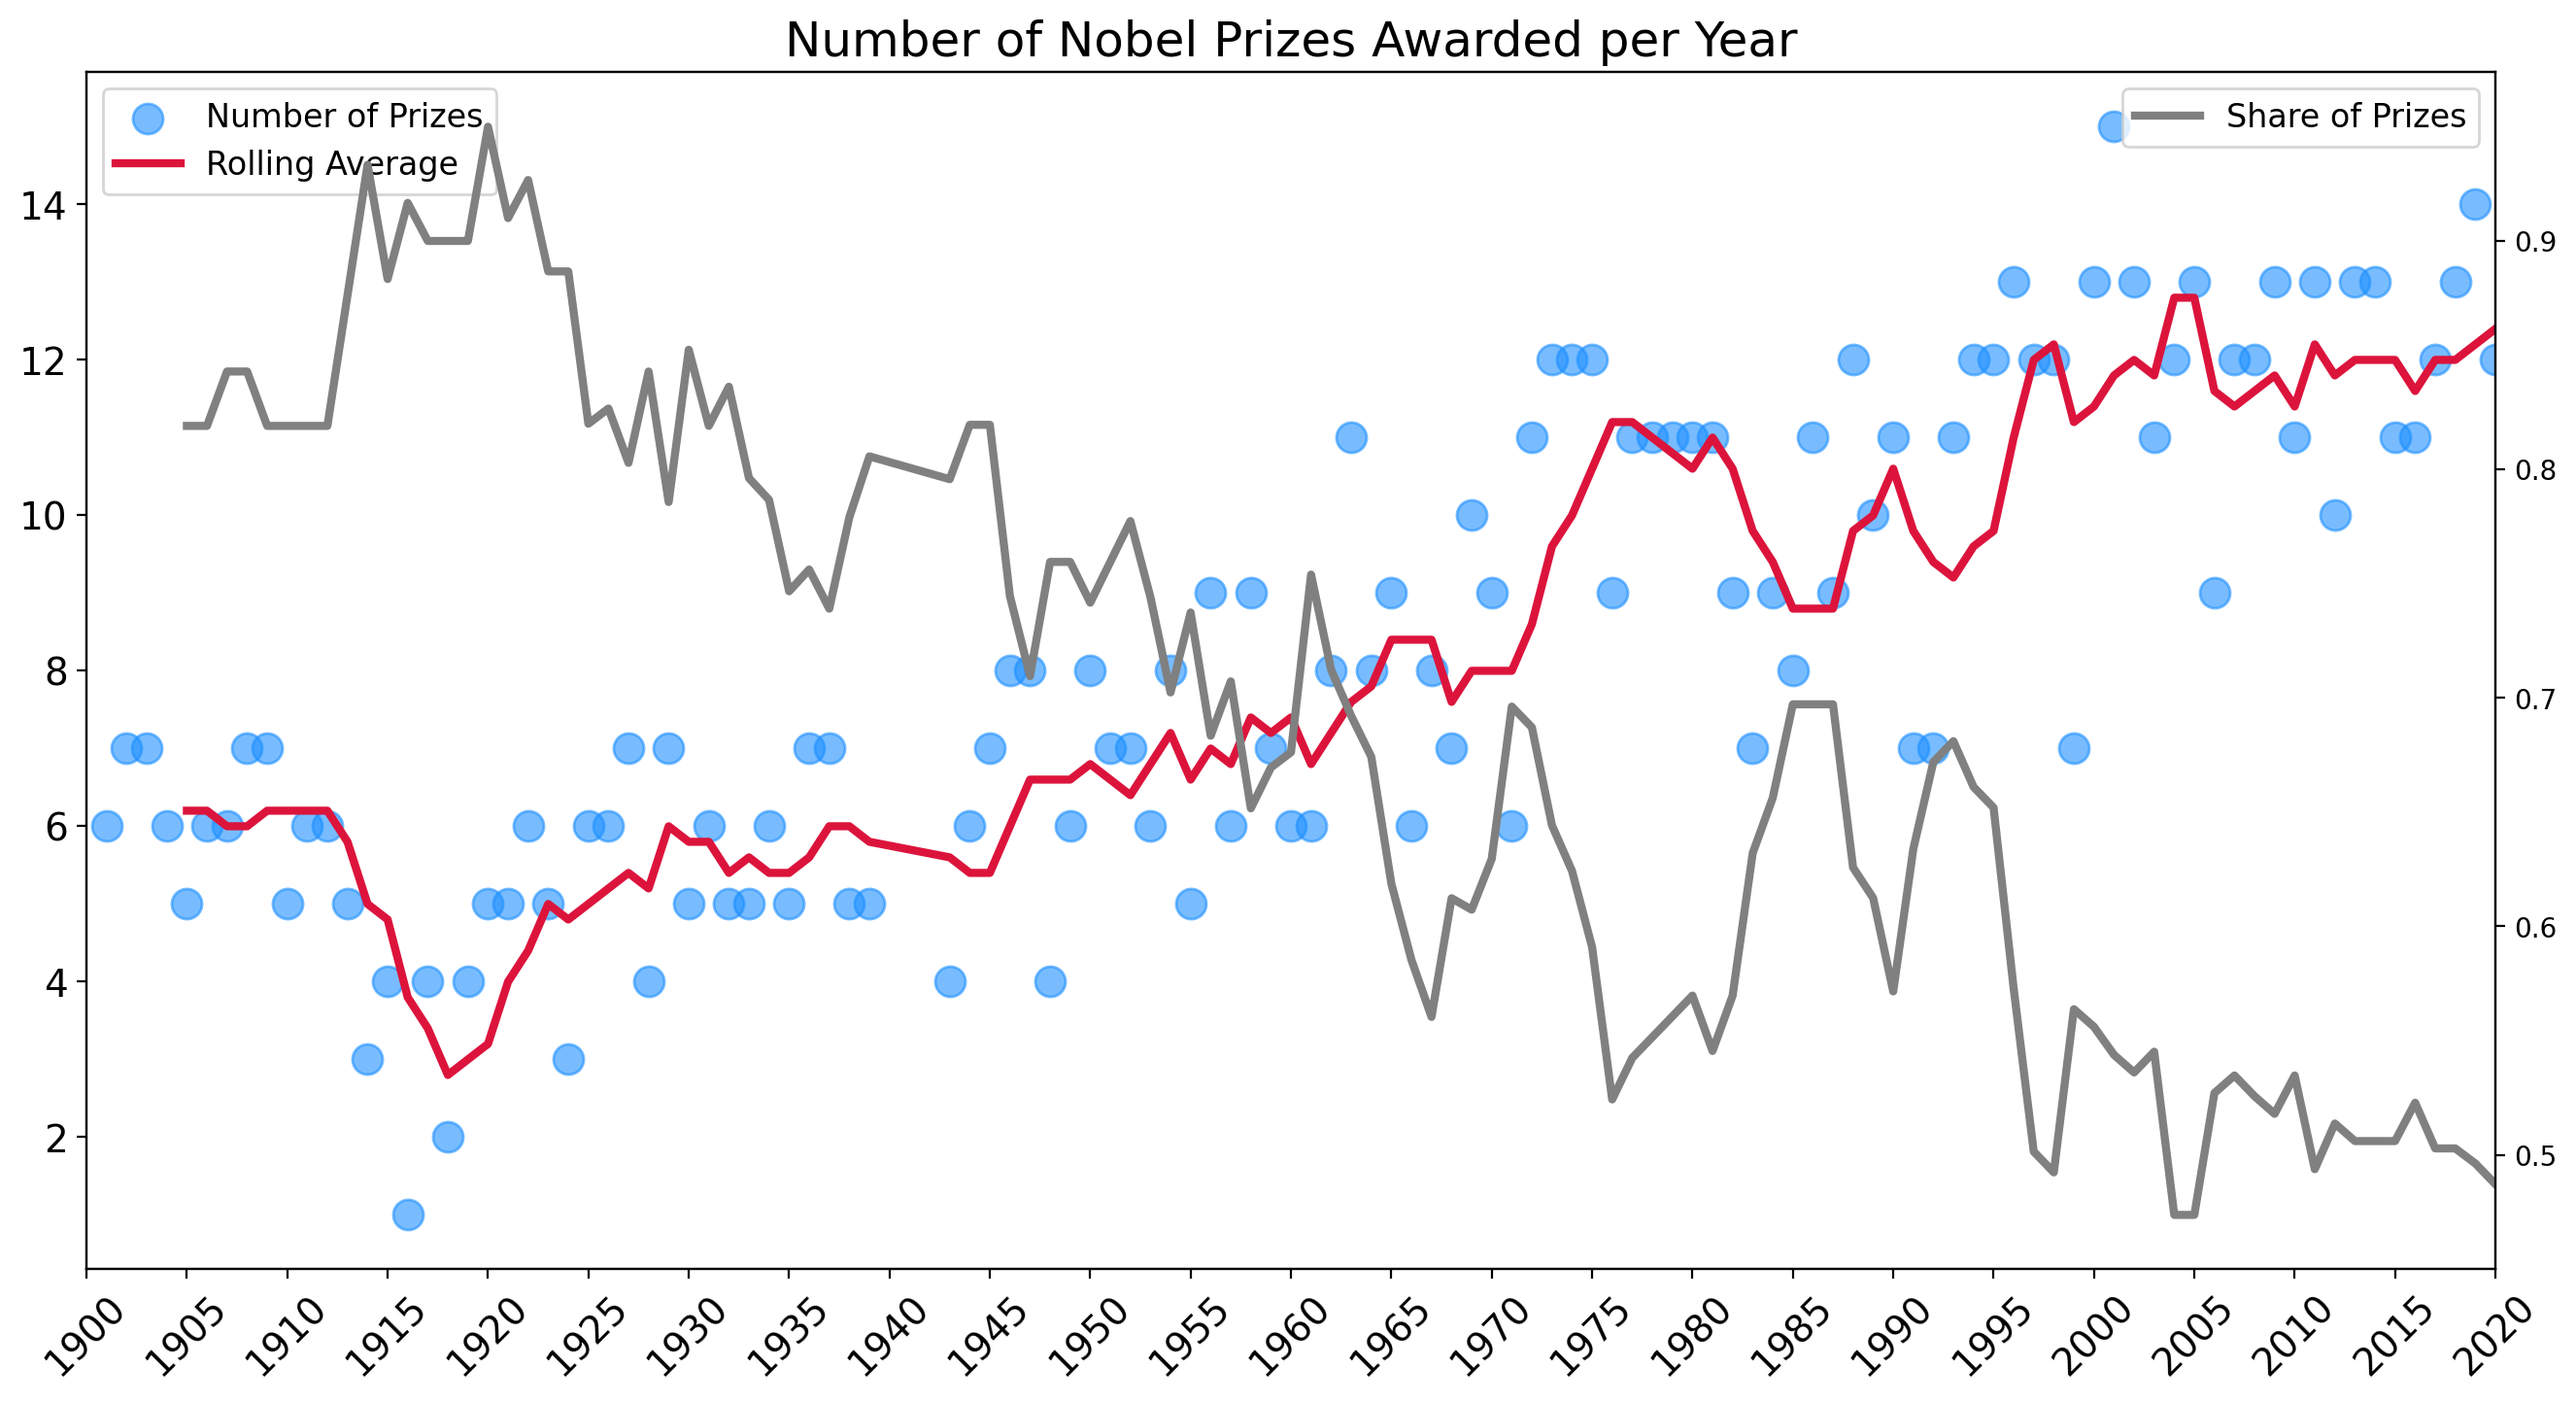

In [33]:
# Q. Copy-paste the cell from the chart you created above.
# Modify the code to add a secondary axis to your Matplotlib chart.
# Plot the rolling average of the prize share on this chart.

plt.figure(figsize=(16, 8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.xticks(ticks=range(1900, 2021, 5), rotation=45, fontsize=14)
plt.yticks(fontsize=14)


ax1 = plt.gca()
# Second y-axis
ax2 = ax1.twinx()

ax1.set_xlim(1900, 2020)

scatter_plot = ax1.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    s=125,
    c="dodgerblue",
    alpha=0.6,
    label="Number of Prizes",
)

line_plot = ax1.plot(
    prize_per_year.index,
    prize_roll_avg.values,
    c="crimson",
    linewidth=3,
    label="Rolling Average",
)

share_line_plot = ax2.plot(
    prize_per_year.index,
    share_roll_avg.values,
    c="grey",
    linewidth=3,
    label="Share of Prizes",
)

ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
plt.show()

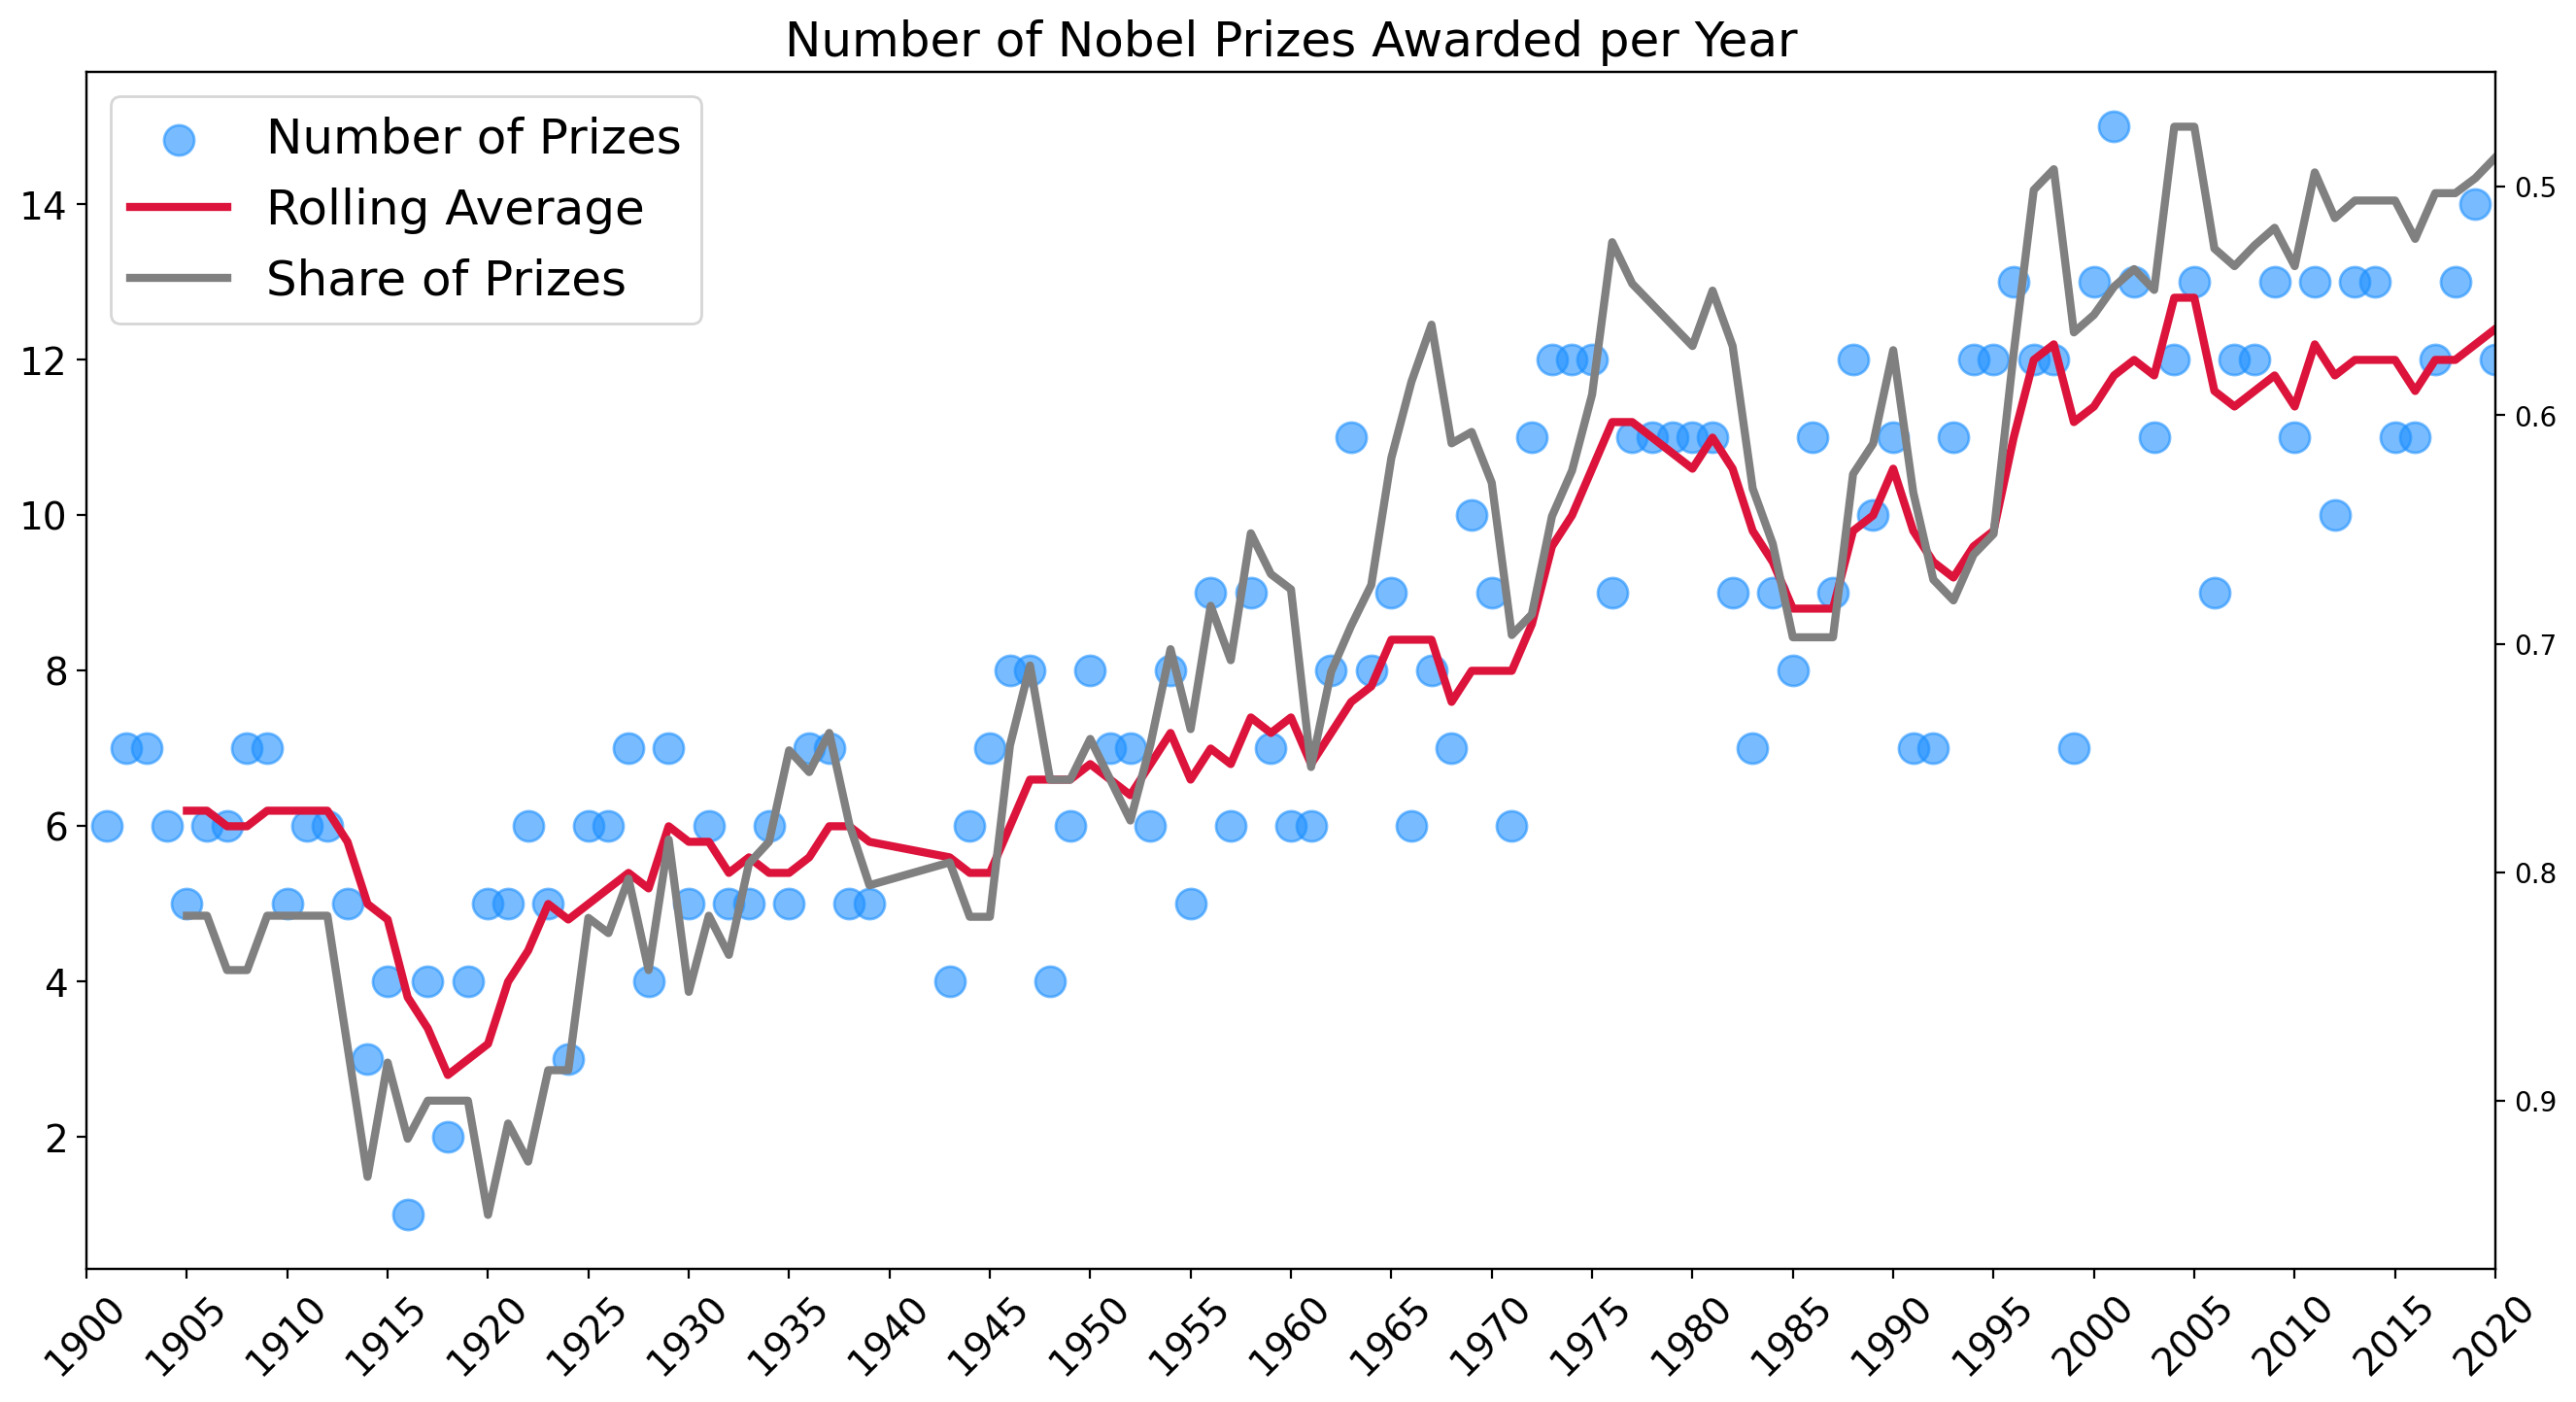

In [34]:
# Q. invert the secondary y-axis to make the relationship even more clear.

plt.figure(figsize=(16, 8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.xticks(ticks=range(1900, 2021, 5), rotation=45, fontsize=14)
plt.yticks(fontsize=14)


ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)

# Invert y axis for second axis
ax2.invert_yaxis()

scatter_plot = ax1.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    s=125,
    c="dodgerblue",
    alpha=0.6,
    label="Number of Prizes",
)

(line_plot,) = ax1.plot(
    prize_per_year.index,
    prize_roll_avg.values,
    c="crimson",
    linewidth=3,
    label="Rolling Average",
)

(share_line_plot,) = ax2.plot(
    prize_per_year.index,
    share_roll_avg.values,
    c="grey",
    linewidth=3,
    label="Share of Prizes",
)

plt.legend(
    handles=[scatter_plot, line_plot, share_line_plot],
    fontsize=18,
)
plt.show()

# The Countries with the Most Nobel Prizes

**q**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 
* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:
* What is the ranking for the top 20 countries in terms of the number of prizes?

In [35]:
df_data["birth_country_current"].value_counts().reset_index()

,birth_country_current,count
0,United States of America,281
1,United Kingdom,105
2,Germany,84
3,France,57
4,Sweden,29
...,...,...
74,Republic of Macedonia,1
75,Venezuela,1
76,Bulgaria,1
77,Madagascar,1


In [36]:
prize_per_country = (
    df_data["birth_country_current"]
    .value_counts()
    .reset_index()
    .rename(columns={"count": "prize"})
)
# .reset_index() Sets birth country as a new column instead of
# index and converts the Series into a df

top20_countries = prize_per_country.sort_values(by="prize")[-20:]
top20_countries

,birth_country_current,prize
18,Belgium,9
20,India,9
19,Hungary,9
16,Australia,10
15,China,12
14,Norway,12
13,Denmark,12
12,Netherlands,18
11,Austria,18
10,Italy,19


In [37]:
h_bar = px.bar(
    x=top20_countries["prize"],
    y=top20_countries["birth_country_current"],
    color=top20_countries["prize"],
    color_continuous_scale="Plotly3",
)

h_bar.update_layout(
    title="Top 20 Countries by Number of PRizes",
    xaxis_title="Number of Prizes",
    yaxis_title="Country",
    coloraxis_showscale=False,
)

h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

In [38]:
df_country_prizes = df_data.groupby(
    by=["birth_country_current", "ISO"], as_index=False
).agg({"prize": "count"})

df_country_prizes

,birth_country_current,ISO,prize
0,Algeria,DZA,2
1,Argentina,ARG,4
2,Australia,AUS,10
3,Austria,AUT,18
4,Azerbaijan,AZE,1
...,...,...,...
74,United States of America,USA,281
75,Venezuela,VEN,1
76,Vietnam,VNM,1
77,Yemen,YEM,1


In [39]:
prize_choropleth = px.choropleth(
    df_country_prizes,
    locations="ISO",
    color="prize",
    hover_name="birth_country_current",
    color_continuous_scale="OrRd",
)

prize_choropleth.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Q**: Divide up the plotly bar chart created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?

The hard part is preparing the data for this chart.


In [40]:
# df on countries, the corresponding category and category's total prizes won
country_category = df_data.groupby(
    by=["birth_country_current", "category"], as_index=False
).agg({"prize": pd.Series.count})

country_category

,birth_country_current,category,prize
0,Algeria,Literature,1
1,Algeria,Physics,1
2,Argentina,Medicine,2
3,Argentina,Peace,2
4,Australia,Chemistry,1
...,...,...,...
206,United States of America,Physics,70
207,Venezuela,Medicine,1
208,Vietnam,Peace,1
209,Yemen,Peace,1


In [41]:
# Review top20_countries, the df to be merged with previous df
top20_countries.sample(3)

,birth_country_current,prize
6,Japan,27
16,Australia,10
5,Poland,27


In [42]:
# Merge country_category with previous top20_countries containing total prizes won for that country
country_category_prizes = pd.merge(
    country_category, top20_countries, on="birth_country_current"
)
country_category_prizes.head()



,birth_country_current,category,prize_x,prize_y
0,Australia,Chemistry,1,10
1,Australia,Medicine,7,10
2,Australia,Physics,2,10
3,Austria,Chemistry,5,18
4,Austria,Economics,1,18


In [43]:
# Change column names
country_category_prizes.rename(
    columns={
        "prize_x": "cat_prize",
        "prize_y": "total_prize",
    },
    inplace=True,
)

# Sort
country_category_prizes.sort_values(by="total_prize", ascending=True ,inplace=True)
country_category_prizes

,birth_country_current,category,cat_prize,total_prize
12,Belgium,Peace,3,9
42,Hungary,Chemistry,3,9
43,Hungary,Economics,1,9
52,India,Physics,1,9
51,India,Peace,1,9
...,...,...,...,...
104,United States of America,Chemistry,55,281
105,United States of America,Economics,49,281
106,United States of America,Literature,10,281
107,United States of America,Medicine,78,281


In [44]:
# There are 20 Countries
country_category_prizes["birth_country_current"].nunique()

20

In [45]:
# Without color, seems fine.
country_by_category_bar = px.bar(
    x=country_category_prizes["cat_prize"],
    y=country_category_prizes["birth_country_current"],
)

country_by_category_bar.update_layout(
    title="Top 20 Countries by Number of Prizes and Category",
    xaxis_title="Number of Prizes",
    yaxis_title="Country",
)

country_by_category_bar.show()

In [46]:
# When color argument is added, Autralia and Hungary somehow jumps to the top. ????
country_by_category_bar = px.bar(
    x=country_category_prizes["cat_prize"],
    y=country_category_prizes["birth_country_current"],
    color=country_category_prizes["category"],  # Color added
)

country_by_category_bar.update_layout(
    title="Top 20 Countries by Number of Prizes and Category",
    xaxis_title="Number of Prizes",
    yaxis_title="Country",
)

country_by_category_bar.show()

In [47]:
country_by_category_bar = px.bar(
    x=country_category_prizes["cat_prize"],
    y=country_category_prizes["birth_country_current"],
    color=country_category_prizes["category"],
)

country_by_category_bar.update_layout(
    title="Top 20 Countries by Number of Prizes and Category",
    xaxis_title="Number of Prizes",
    yaxis_title="Country",
    yaxis={  # This fixes it. Don't know why it's breaking in the first place
        "categoryorder": "total ascending"
    },
)

country_by_category_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [48]:
prize_by_year = df_data.groupby(
    by=["year", "birth_country_current"], as_index=False
).count()

prize_by_year = prize_by_year.sort_values(by="year")[
    ["year", "birth_country_current", "prize"]
]

prize_by_year

,year,birth_country_current,prize
0,1901,France,2
1,1901,Germany,1
2,1901,Netherlands,1
3,1901,Poland,1
4,1901,Switzerland,1
...,...,...,...
617,2019,Germany,1
625,2020,United Kingdom,2
623,2020,France,1
624,2020,Germany,1


In [49]:
# We've somehow gone full circle by grouping year and birth_country_current again, but we had
# to sort by year earlier.
prize_by_year = (
    prize_by_year.groupby(by=["birth_country_current", "year"])
    .sum()
    .groupby(by=["birth_country_current"])
)

cumulative_prize = prize_by_year.cumsum().reset_index()
cumulative_prize

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [50]:
# Function for filling zeros with the proper cumulative sum value.
def fill_cumulative_sum(values_list):
    new_list = [values_list[0]]  # Initialize the new list with the first value

    for i in range(1, len(values_list)):
        if values_list[i] > new_list[i - 1]:
            # Add the current value to the new list
            new_list.append(values_list[i])
        else:
            # Add the previous filled value to the new list
            new_list.append(new_list[i - 1])

    return new_list


filt_ger = cumulative_prize["birth_country_current"] == "Germany"
filt_usa = cumulative_prize["birth_country_current"] == "United States of America"

df_ger = cumulative_prize.loc[filt_ger]
df_usa = cumulative_prize.loc[filt_usa]

years_ser = pd.Series(range(1900, 2021)).to_frame().rename(columns={0: "year"})

# Replace NA values with zeros.
df_ger = years_ser.merge(df_ger, how="left").fillna(
    {"birth_country_current": "Germany", "prize": 0}
)

df_usa = years_ser.merge(df_usa, how="left").fillna(
    {"birth_country_current": "United States of America", "prize": 0}
)

# Fix zeros with proper cumulative sum
df_ger["prize"] = fill_cumulative_sum(df_ger["prize"])
df_usa["prize"] = fill_cumulative_sum(df_usa["prize"])

df_merged = df_ger.merge(df_usa, how="outer", on="year")

# This df contains all the years from 1900 to 2020 and the cumulative prize of Germany vs USA
# Play with it!
df_merged

,year,birth_country_current_x,prize_x,birth_country_current_y,prize_y
0,1900,Germany,0.00,United States of America,0.00
1,1901,Germany,1.00,United States of America,0.00
2,1902,Germany,3.00,United States of America,0.00
3,1903,Germany,3.00,United States of America,0.00
4,1904,Germany,3.00,United States of America,0.00
...,...,...,...,...,...
116,2016,Germany,80.00,United States of America,259.00
117,2017,Germany,82.00,United States of America,265.00
118,2018,Germany,82.00,United States of America,271.00
119,2019,Germany,83.00,United States of America,274.00


In [51]:
# Let us see when USA overtook Germany
filt = df_merged["prize_y"] > df_merged["prize_x"]
df_merged.loc[filt].min()

year                                           1951
birth_country_current_x                     Germany
prize_x                                       38.00
birth_country_current_y    United States of America
prize_y                                       40.00
dtype: object

In [52]:
line_chart = px.line(
    cumulative_prize,
    x="year",
    y="prize",
    color="birth_country_current",
    hover_name="birth_country_current",
)

line_chart.update_layout(xaxis_title="Year", yaxis_title="Number of Prizes")

line_chart.show()

# What are the Top Research Organisations?

**Q**: Create a bar chart showing the organisations affiliated with the Nobel laureates.

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [53]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [54]:
top20_orgs = df_data["organization_name"].value_counts(ascending=True)[-20:]
top20_orgs

organization_name
London University                                7
Sorbonne University                              7
Harvard Medical School                           7
University College London                        7
Bell Laboratories                                8
Cornell University                               8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Rockefeller University                          13
Max-Planck-Institut                             13
Princeton University                            15
Columbia University                             17
California Institute of Technology (Caltech)    17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of

In [55]:
# Without color, seems fine.
org_bar = px.bar(
    x=top20_orgs.values,
    y=top20_orgs.index,
    color=top20_orgs.values,
    color_continuous_scale=px.colors.sequential.haline,
)

org_bar.update_layout(
    title="Top 20 Research Institutions by Number of Prizes",
    xaxis_title="Number of Prizes",
    yaxis_title="Institution",
    coloraxis_showscale=False,
)

org_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Q**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [56]:
top20_org_cities = df_data["organization_city"].value_counts(ascending=True)[-20:]

org_city = px.bar(
    x=top20_org_cities.values,
    y=top20_org_cities.index,
    color=top20_org_cities.values,
    color_continuous_scale=px.colors.sequential.Plasma,
)

org_city.update_layout(
    title="Which Cities Do the Most Research?",
    xaxis_title="Number of Prizes",
    yaxis_title="City",
    coloraxis_showscale=False,
)

org_city.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Q**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [57]:
top20_birth_cities = df_data["birth_city"].value_counts(ascending=True)[-20:]

city_bar = px.bar(
    x=top20_birth_cities.values,
    y=top20_birth_cities.index,
    color=top20_birth_cities.values,
    color_continuous_scale=px.colors.sequential.Plasma,
)

city_bar.update_layout(
    title="Where were the Nobel Laureates Born?",
    xaxis_title="Number of Prizes",
    yaxis_title="City of Birth",
    coloraxis_showscale=False,
)

city_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 



In [58]:
country_city_org = df_data.groupby(
    by=["organization_country", "organization_city", "organization_name"],
    as_index=False,
).agg({"prize": "count"})

country_city_org = country_city_org.sort_values(by="prize", ascending=False)
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [59]:
# Default size for sunburst chart is too small.
# Adjust this accordingly.
BURST_W = 1500
BURST_H = 1000

cco_burst = px.sunburst(
    country_city_org,
    path=["organization_country", "organization_city", "organization_name"],
    values="prize",
    width=BURST_W,
    height=BURST_H,

)

cco_burst.update_layout(
    title="Where do Discoveries Take Place?",
    xaxis_title="Number of Prizes",
    yaxis_title="City",
    coloraxis_showscale=False,
)

cco_burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Q**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame.

In [60]:
df_data["winning_age"] = df_data["year"] - df_data["birth_date"].dt.year
df_data.head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,47.00


### Who were the oldest and youngest winners?

**Q**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [61]:
# Q: What are the names of the youngest and oldest Nobel laureate? 
# Q. What did they win the prize for?
display(df_data.nsmallest(n=1, columns="winning_age")[["full_name", "winning_age", "prize"]])
display(df_data.nlargest(n=1, columns="winning_age")[["full_name", "winning_age", "prize"]])


,full_name,winning_age,prize
885,Malala Yousafzai,17.00,The Nobel Peace Prize 2014


,full_name,winning_age,prize
937,John Goodenough,97.00,The Nobel Prize in Chemistry 2019


In [62]:
# Q. What is the average age of a winner?
# Q. 75% of laureates are younger than what age when they receive the prize?
df_data["winning_age"].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

c:\Users\CKL\.vscode\portfolio\nobel-prize-winners\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\CKL\.vscode\portfolio\nobel-prize-winners\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



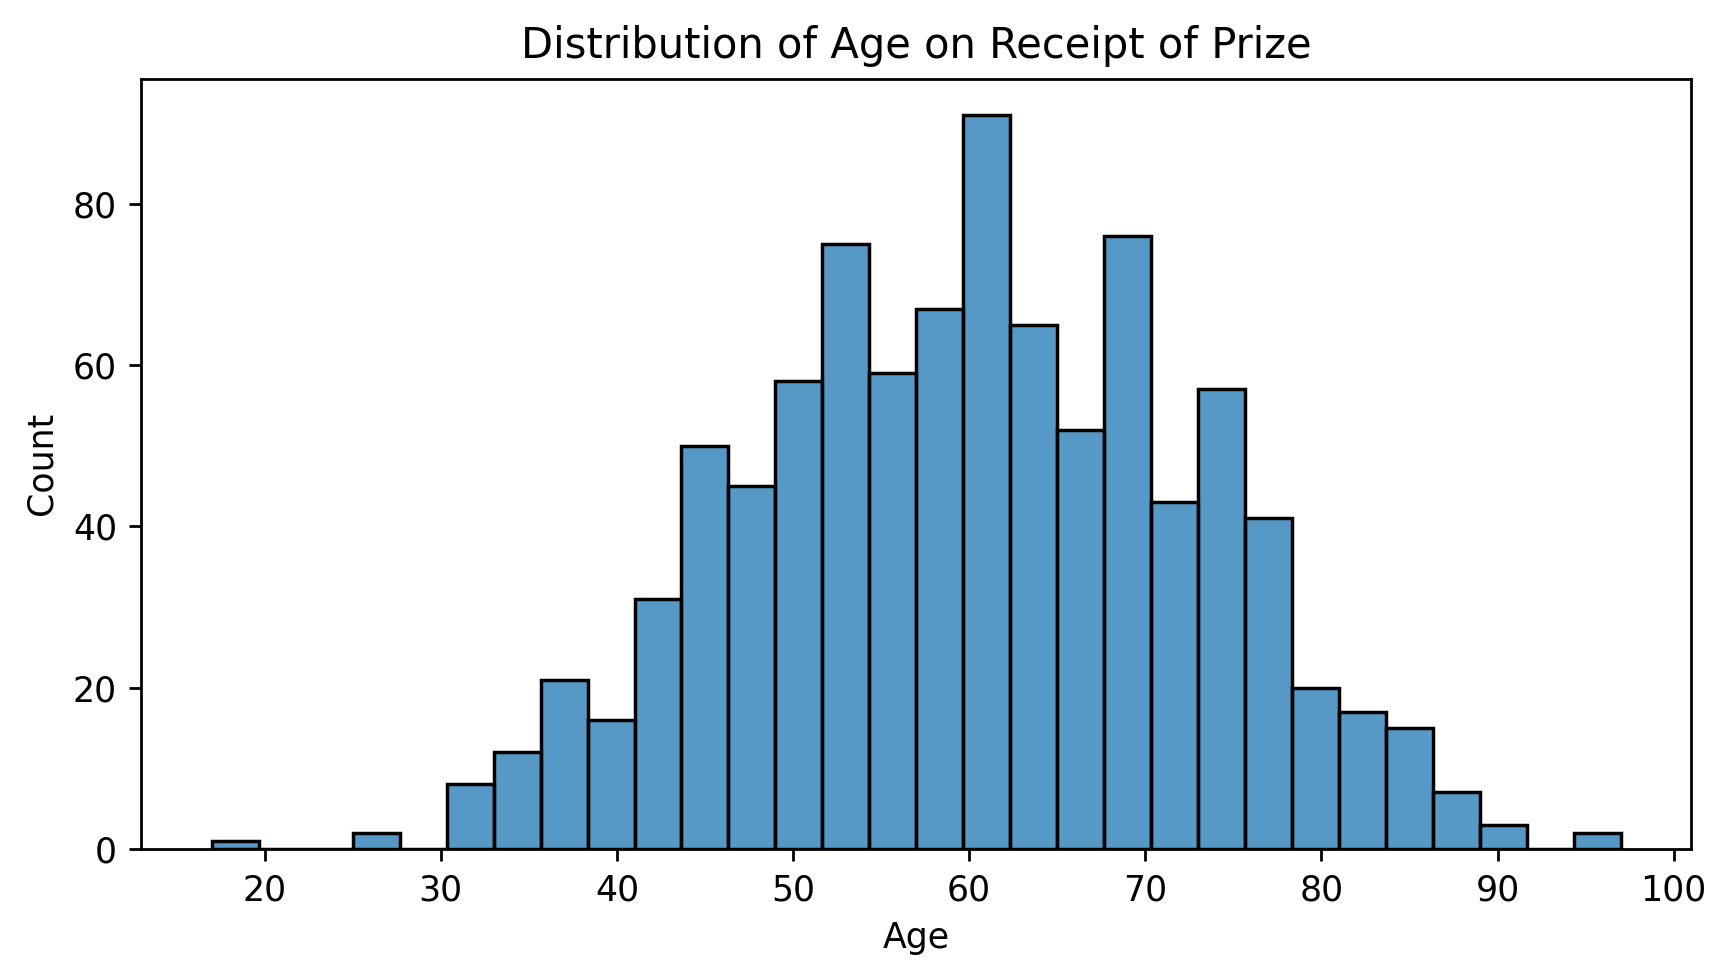

In [63]:
plt.figure(figsize=(8, 4), dpi=250)

plt.title('Distribution of Age on Receipt of Prize')

sns.histplot(
    data=df_data,
    x=df_data["winning_age"],
    bins=30,
)

plt.xlabel("Age")
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Q**

* [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


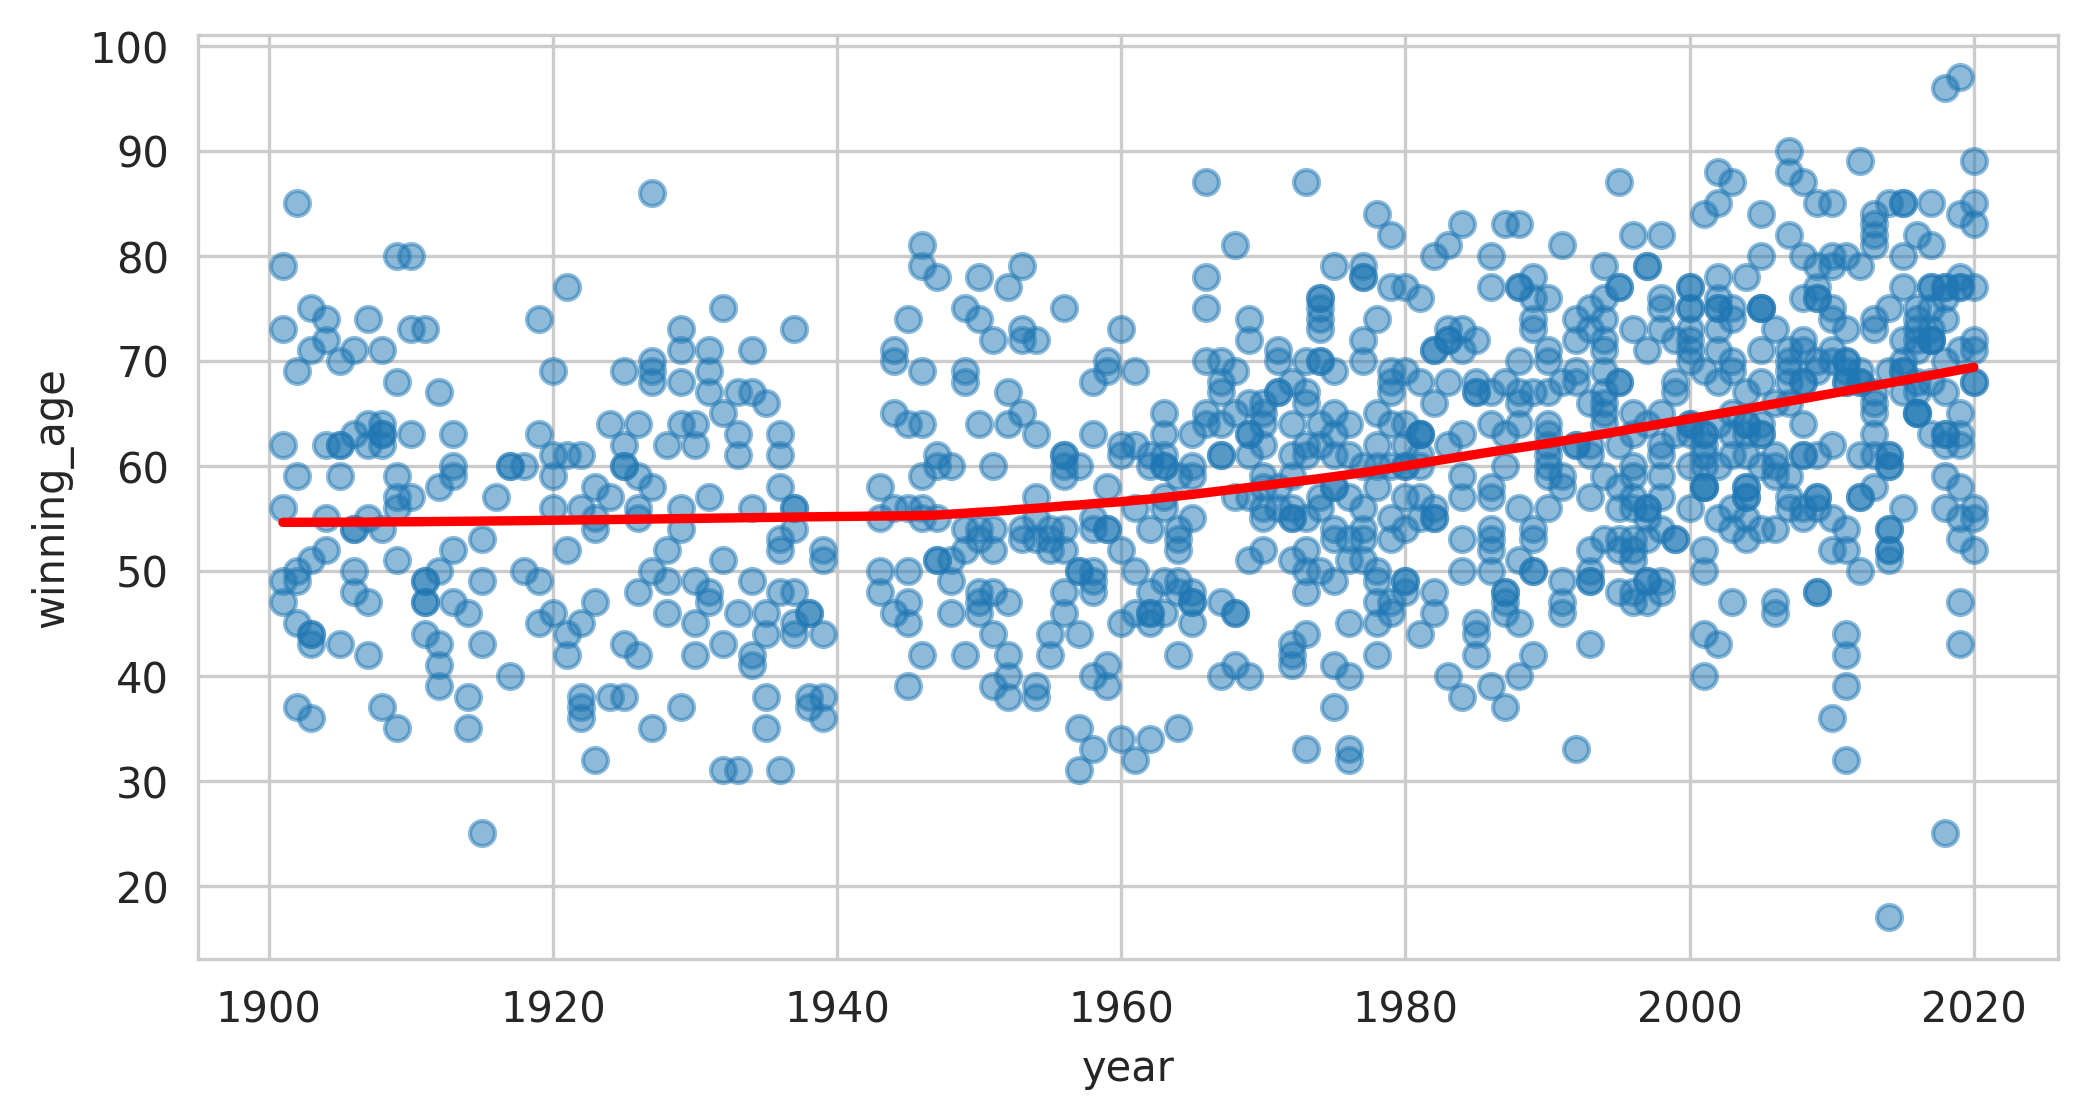

In [66]:
plt.figure(figsize=(8, 4), dpi=300)

with sns.axes_style("whitegrid"):
    sns.regplot(
        data=df_data,
        x="year",
        y="winning_age",
        lowess=True,
        scatter_kws={"alpha": 0.5},
        line_kws={"color": "red"},
    )

plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

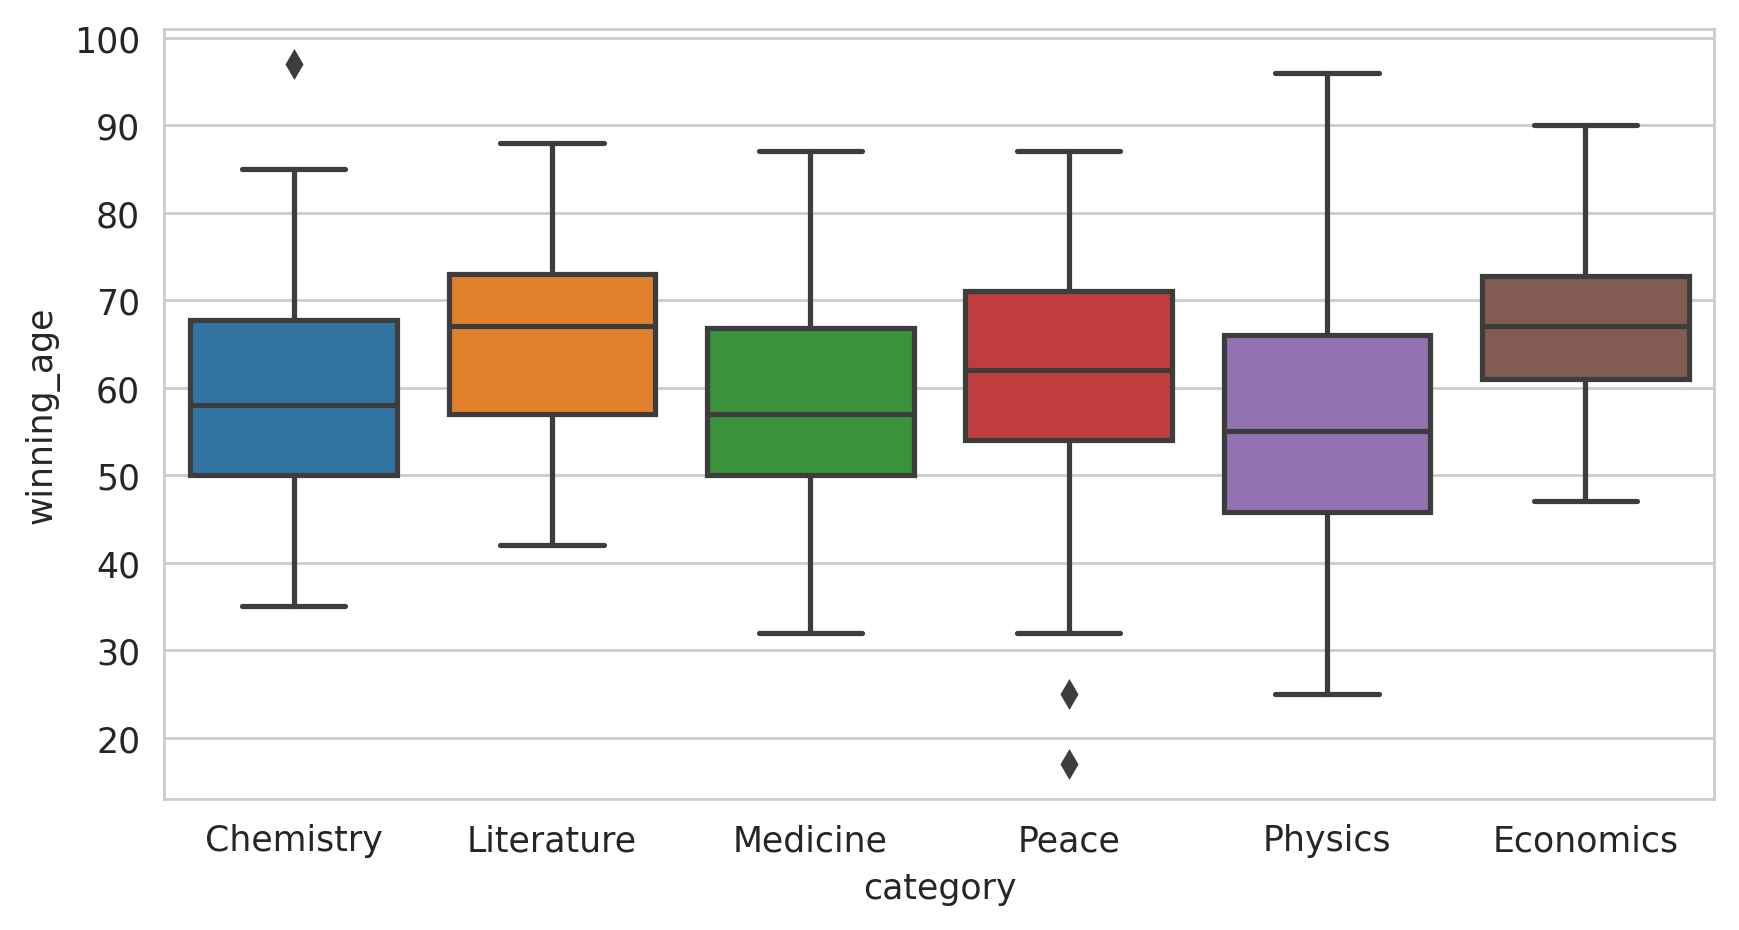

In [ ]:
plt.figure(figsize=(8, 4), dpi=250)

with sns.axes_style("whitegrid"):
    sns.boxplot(
        data=df_data,
        x="category",
        y="winning_age",
    )

plt.show()

In [ ]:
# Using plotly. Plotly's box and whisker plot is interactive.
box = px.box(
    df_data,
    x="category",
    y="winning_age",
)

box.update_layout(
    title="How old are the Winners?",
    xaxis_title="Category",
    yaxis_title="Age at time of Award",
    xaxis={"categoryorder": "mean ascending"},
)

box.show()

**Q**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


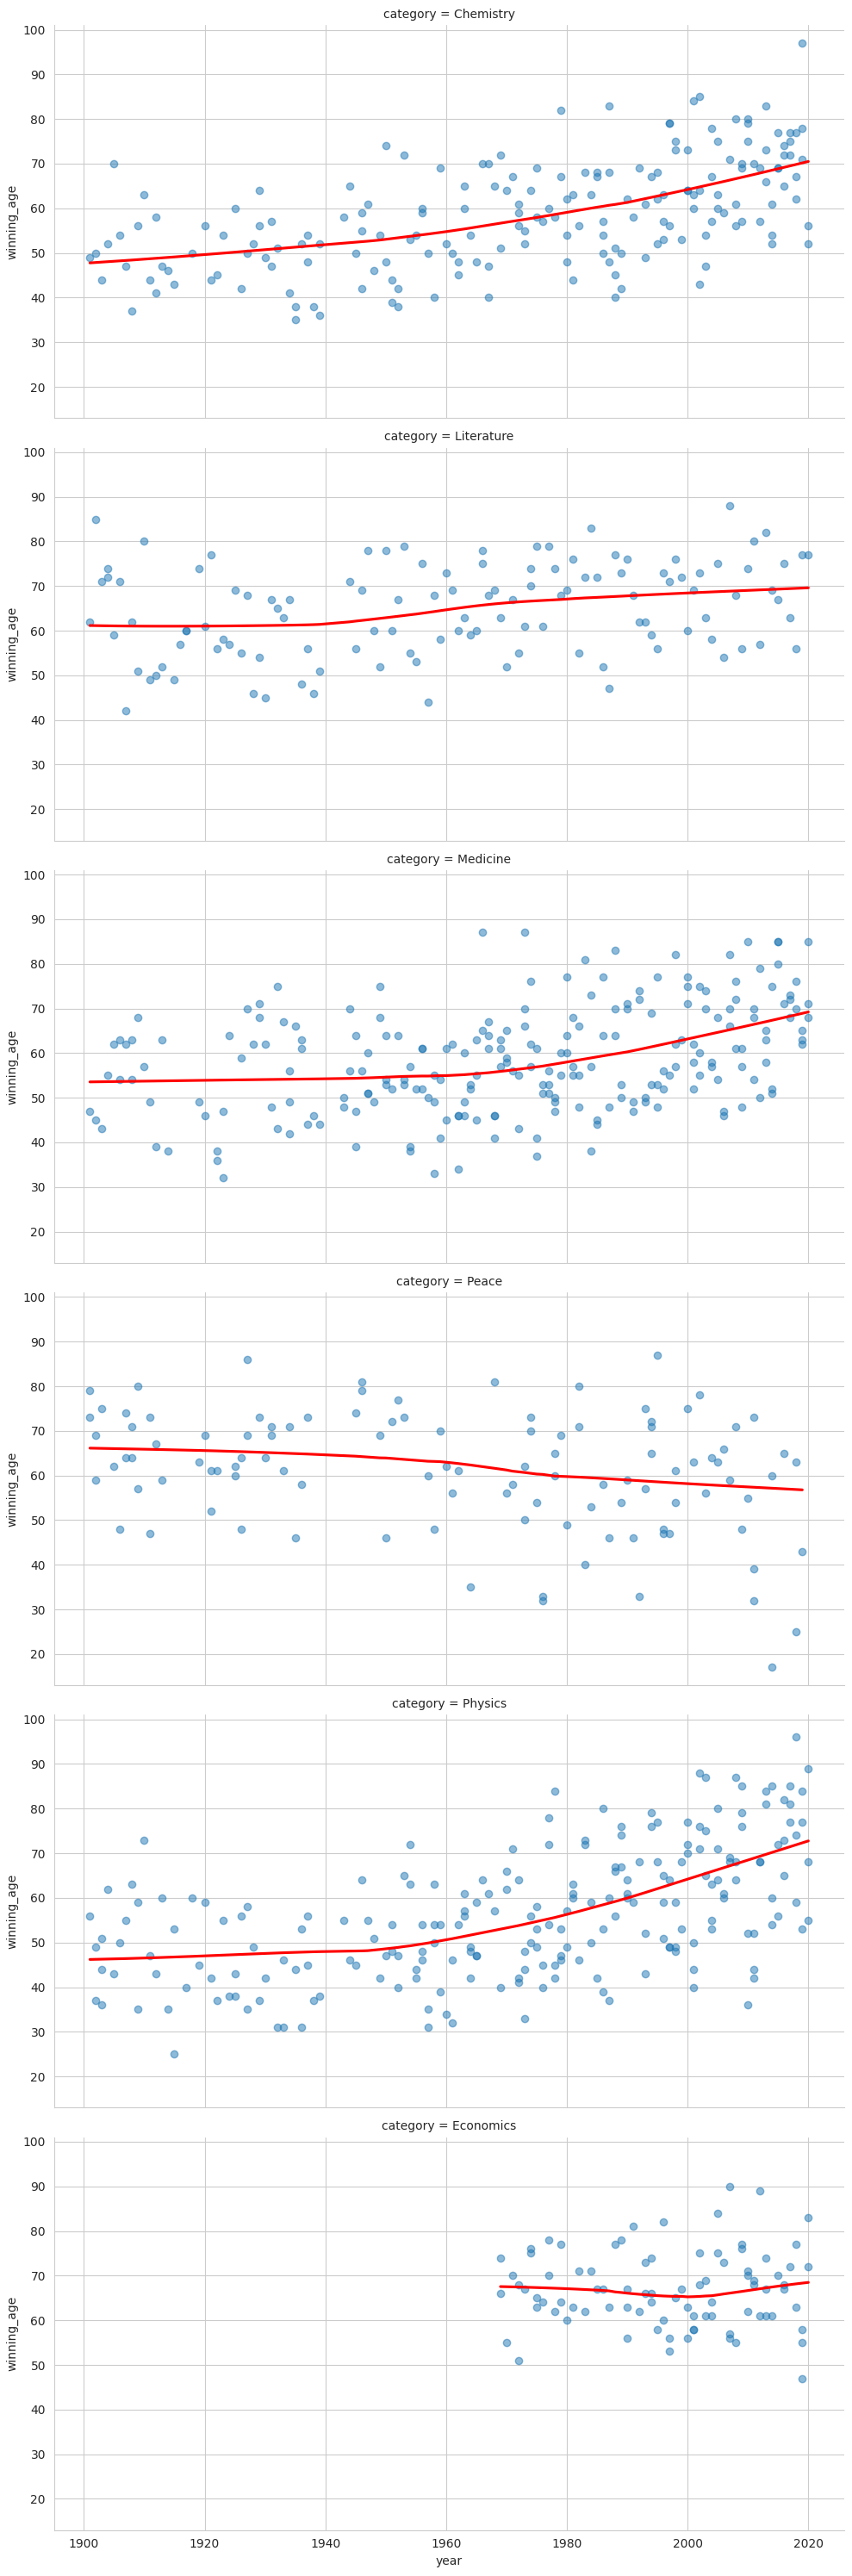

In [ ]:
with sns.axes_style("whitegrid"):
    sns.lmplot(
        data=df_data,
        x="year",
        y="winning_age",
        row="category",
        lowess=True,
        aspect=2,
        scatter_kws={"alpha": 0.5},
        line_kws={"color": "red"},
    )

plt.show()

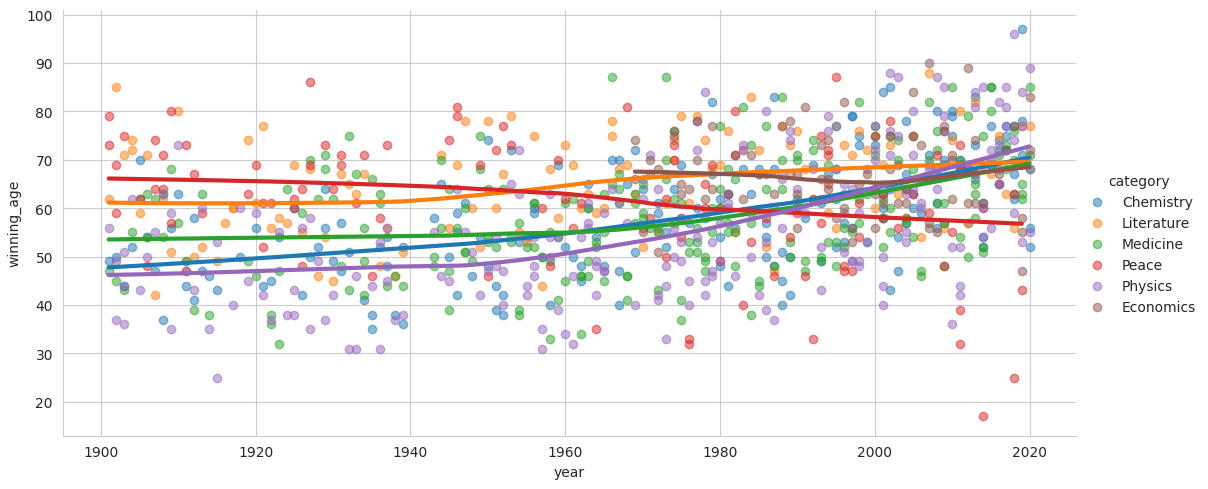

In [ ]:
with sns.axes_style("whitegrid"):
    sns.lmplot(
        data=df_data,
        x="year",
        y="winning_age",
        hue="category",
        lowess=True,
        aspect=2.2,
        scatter_kws={"alpha": 0.5},
        line_kws={"linewidth": 3},
    )

plt.show()